### Testing Functions for Cluster Validation

Author: Brianna Kozemzak

Last Updated: Dec 14, 2017

### Purpose

This file was created in order to test the behavior of function in edge cases.

In [1]:
######################################
## Import Libraries Used Throughout ##
######################################

import pandas as pd
import numpy as np

### utilities.py

In [2]:
from utilities import *

In [3]:
#################################
## single_cluster_membership() ##
#################################

# Create mock clusters
clusters = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 1, 1), \
        ('pt_4', 1, 0, 0)]
clusters_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters = pd.DataFrame(clusters, columns=clusters_cols)
clusters = clusters.set_index('patient_id')

# Call the function
single_cluster_membership(clusters)

False

In [4]:
##################
## counts_for() ##
##################

# Create mock clusters
clusters = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 1, 1), \
        ('pt_4', 1, 0, 0)]
clusters_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters = pd.DataFrame(clusters, columns=clusters_cols)
clusters = clusters.set_index('patient_id')

# Create mock labels
labels = [('pt_1', 'autism', 'female', 1), \
        ('pt_2', 'control', 'male', np.nan), \
        ('pt_3', 'autism spectrum', 'male', 0), \
        ('pt_4', 'autism', 'female', 1)]
labels_cols = ['patient_id', 'diagnosis', 'gender', 'behavioral_history']
labels = pd.DataFrame(labels, columns=labels_cols)
labels = labels.set_index('patient_id')

# Call the function
counts_for(labels['behavioral_history'], clusters)

,0.0,1.0,missing
0,0.0,2.0,0.0
1,1.0,0.0,1.0
2,1.0,0.0,0.0


### soft_to_crisp_clusters.py

In [5]:
from soft_to_crisp_clusters import *

In [6]:
##############################
## soft_to_crisp_clusters() ##
##############################

# Create mock clusters
clusters = [('pt_1', 0.55, 0.3, 0.15), \
        ('pt_2', 0.5, 0.35, 0.15), \
        ('pt_3', 0.0, 0.4, 0.4), \
        ('pt_4', 0.1, 0.3, 0.6)]
clusters_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters = pd.DataFrame(clusters, columns=clusters_cols)
clusters = clusters.set_index('patient_id')

# Call the function
soft_to_crisp_clusters(clusters, rule='multiple')

,clust0,clust1,clust2
patient_id,,,
pt_1,1,1,1
pt_2,1,1,1
pt_3,0,1,1
pt_4,1,1,1


### heatmap.py

In [7]:
from heatmap import *

In [8]:
####################
## numeric_data() ##
####################

# Create mock features
features = [('pt_1', 0, 4, 0.3, 0, 1), \
        ('pt_2', 1, 3, 0.2, 'hi', 1), \
        ('pt_3', 0, 0, 0.1, 0, 0.5), \
        ('pt_4', 1, 1, 0.5, 0, 1)]
features_cols = ['patient_id', 'feat0', 'feat1', 'feat2', 'feat3', 'feat4']
features = pd.DataFrame(features, columns=features_cols)
features = features.set_index('patient_id')

# Call the function
numeric_data(features)

Non-numeric columns were removed from the data set


,feat0,feat1,feat2,feat4
patient_id,,,,
pt_1,0,4,0.3,1.0
pt_2,1,3,0.2,1.0
pt_3,0,0,0.1,0.5
pt_4,1,1,0.5,1.0


In [9]:
#################
## sort_data() ##
#################

# Create mock clusters
clusters = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 0, 1), \
        ('pt_4', 1, 0, 0)]
clusters_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters = pd.DataFrame(clusters, columns=clusters_cols)
clusters = clusters.set_index('patient_id')

# Create mock features
features = [('pt_1', 0, 4, 0.3, 0, 1), \
        ('pt_2', 1, 3, 0.2, 0, 1), \
        ('pt_3', 0, 0, 0.1, 0, 0.5), \
        ('pt_4', 1, 1, 0.5, 0, 1)]
features_cols = ['patient_id', 'feat0', 'feat1', 'feat2', 'feat3', 'feat4']
features = pd.DataFrame(features, columns=features_cols)
features = features.set_index('patient_id')

# Call the function
sort_data(features, sort_by=['feat1'], clusters=clusters)

,cluster_id,feat0,feat1,feat2,feat3,feat4
patient_id,,,,,,
pt_4,0,1,1,0.5,0,1.0
pt_1,0,0,4,0.3,0,1.0
pt_2,1,1,3,0.2,0,1.0
pt_3,2,0,0,0.1,0,0.5


In [10]:
##################
## scale_data() ##
##################

# Create mock features
features = [('pt_1', 0, 4, 0.3, 0, 1), \
        ('pt_2', 1, 3, 0.2, 0, 1), \
        ('pt_3', 0, 0, 0.1, 0, 0.5), \
        ('pt_4', 1, 1, 0.5, 0, 1)]
features_cols = ['patient_id', 'feat0', 'feat1', 'feat2', 'feat3', 'feat4']
features = pd.DataFrame(features, columns=features_cols)
features = features.set_index('patient_id')

# Call the function
scale_data(features)

,feat0,feat1,feat2,feat3,feat4
patient_id,,,,,
pt_1,0.0,1.00,0.50,0,1.0
pt_2,1.0,0.75,0.25,0,1.0
pt_3,0.0,0.00,0.00,0,0.0
pt_4,1.0,0.25,1.00,0,1.0


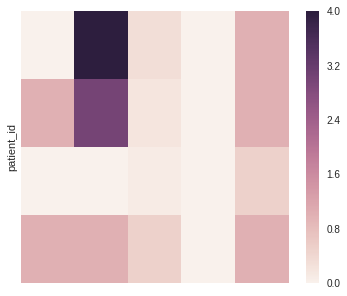

In [11]:
#######################
## display_heatmap() ##
#######################

# Create mock features
features = [('pt_1', 0, 4, 0.3, 0, 1), \
        ('pt_2', 1, 3, 0.2, 0, 1), \
        ('pt_3', 0, 0, 0.1, 0, 0.5), \
        ('pt_4', 1, 1, 0.5, 0, 1)]
features_cols = ['patient_id', 'feat0', 'feat1', 'feat2', 'feat3', 'feat4']
features = pd.DataFrame(features, columns=features_cols)
features = features.set_index('patient_id')

# Call the function
display_heatmap(features, size=(6,5))

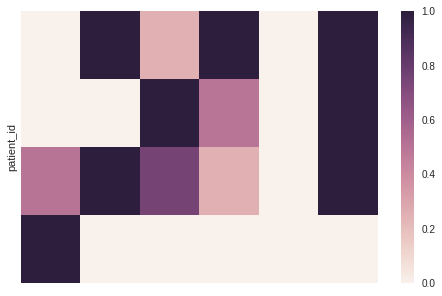

In [12]:
########################
## heatmap_pipeline() ##
########################

# Create mock cluster
clusters = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 0, 1), \
        ('pt_4', 1, 0, 0)]
clusters_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters = pd.DataFrame(clusters, columns=clusters_cols)
clusters = clusters.set_index('patient_id')

# Create mock features
features = [('pt_1', 0, 4, 0.3, 0, 1), \
        ('pt_2', 1, 3, 0.2, 0, 1), \
        ('pt_3', 0, 0, 0.1, 0, 0.5), \
        ('pt_4', 1, 1, 0.5, 0, 1)]
features_cols = ['patient_id', 'feat0', 'feat1', 'feat2', 'feat3', 'feat4']
features = pd.DataFrame(features, columns=features_cols)
features = features.set_index('patient_id')

# Call the function
heatmap_pipeline(features, sort_by=['feat1'], clusters=clusters, size=(8,5))

### Testing pie_charts.py

In [13]:
from pie_charts import *

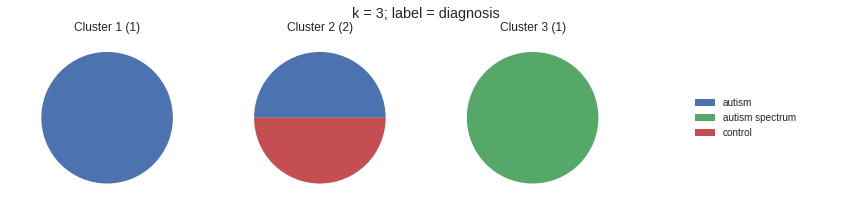

In [14]:
#########################
## display_pie_chart() ##
#########################

# Create mock clusters
clusters = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 0, 1), \
        ('pt_4', 0, 1, 0)]
clusters_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters = pd.DataFrame(clusters, columns=clusters_cols)
clusters = clusters.set_index('patient_id')

# Create mock labels
labels = [('pt_1', 'autism', 'male', 'white'), \
        ('pt_2', 'control', 'female', 'missing'), \
        ('pt_3', 'autism spectrum', 'female', 'white'), \
        ('pt_4', 'autism', 'female', 'asian')]
labels_cols = ['patient_id', 'diagnosis', 'gender', 'race']
labels = pd.DataFrame(labels, columns=labels_cols)
labels = labels.set_index('patient_id')

# Get mock counts
counts = counts_for(labels['diagnosis'], clusters)

# Call the function
display_pie_chart('diagnosis', counts)

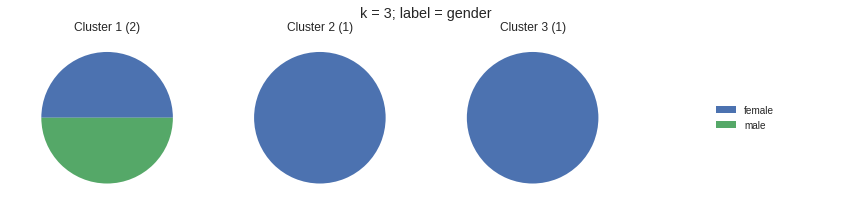

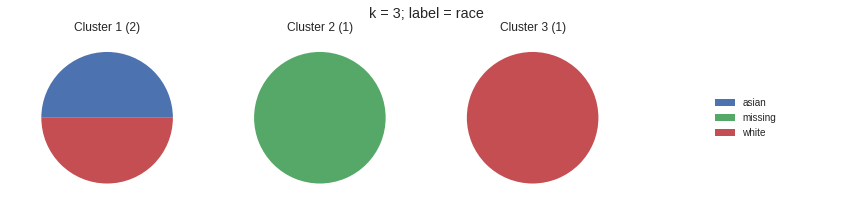

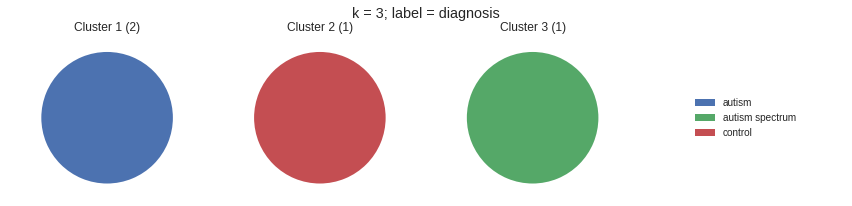

In [15]:
###########################
## pie_charts_pipeline() ##
###########################

# Create mock clusters
clusters = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 0, 1), \
        ('pt_4', 1, 0, 0)]
clusters_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters = pd.DataFrame(clusters, columns=clusters_cols)
clusters = clusters.set_index('patient_id')

# Create mock labels
labels = [('pt_1', 'autism', 'male', 'white'), \
        ('pt_2', 'control', 'female', 'missing'), \
        ('pt_3', 'autism spectrum', 'female', 'white'), \
        ('pt_4', 'autism', 'female', 'asian')]
labels_cols = ['patient_id', 'diagnosis', 'gender', 'race']
labels = pd.DataFrame(labels, columns=labels_cols)
labels = labels.set_index('patient_id')

# Call the function
pie_charts_pipeline(labels, clusters)

### Testing crisp_label_enrichment.py

In [16]:
from crisp_label_enrichment import *

In [17]:
##############################
## crisp_label_enrichment() ##
##############################

# Create mock clusters
clusters = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 0, 1), \
        ('pt_4', 1, 0, 0)]
clusters_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters = pd.DataFrame(clusters, columns=clusters_cols)
clusters = clusters.set_index('patient_id')

# Create mock labels
labels = [('pt_1', 'autism', 'male', 'white'), \
        ('pt_2', 'control', 'female', 'missing'), \
        ('pt_3', 'autism spectrum', 'female', 'white'), \
        ('pt_4', 'autism', 'female', 'asian')]
labels_cols = ['patient_id', 'diagnosis', 'gender', 'race']
labels = pd.DataFrame(labels, columns=labels_cols)
labels = labels.set_index('patient_id')

# Call the function
crisp_label_enrichment(labels, clusters, alpha=0.4)

,label,label_value,cluster,adjusted_p_value,significant
0,gender,female,0,0.500000,0
1,gender,female,1,0.000000,1
2,gender,female,2,0.000000,1
3,gender,male,0,0.000000,1
4,gender,male,1,0.352941,1
5,gender,male,2,0.352941,1
6,race,asian,0,0.000000,1
7,race,asian,1,0.352941,1
8,race,asian,2,0.352941,1
9,race,missing,0,0.500000,0


### Testing visualize_movement.py

In [18]:
from visualize_movement import *

In [19]:
#######################
## get_memberships() ##
#######################

# Create mock cluster result a
clusters_a = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 0, 1), \
        ('pt_4', 1, 0, 0)]
clusters_a_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters_a = pd.DataFrame(clusters_a, columns=clusters_a_cols)
clusters_a = clusters_a.set_index('patient_id')

# Create mock cluster result b
clusters_b = [('pt_1', 1, 0), \
        ('pt_2', 0, 1), \
        ('pt_3', 1, 0), \
        ('pt_4', 1, 0)]
clusters_b_cols = ['patient_id', 'clust0', 'clust1']
clusters_b = pd.DataFrame(clusters_b, columns=clusters_b_cols)
clusters_b = clusters_b.set_index('patient_id')

# Create mock cluster result c
clusters_c = [('pt_1', 1, 0, 0, 0), \
        ('pt_2', 0, 0, 0, 1), \
        ('pt_3', 0, 0, 1, 0), \
        ('pt_4', 1, 0, 0, 0)]
clusters_c_cols = ['patient_id', 'clust0', 'clust1', 'clust2', 'clust3']
clusters_c = pd.DataFrame(clusters_c, columns=clusters_c_cols)
clusters_c = clusters_c.set_index('patient_id')

# Create set of clustering results
all_clusters = [clusters_a, clusters_b, clusters_c]

# Call the function
get_memberships(all_clusters)

,2,3,4
patient_id,,,
pt_1,0,0,0
pt_2,1,1,3
pt_3,0,2,2
pt_4,0,0,0


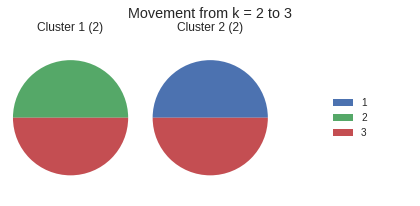

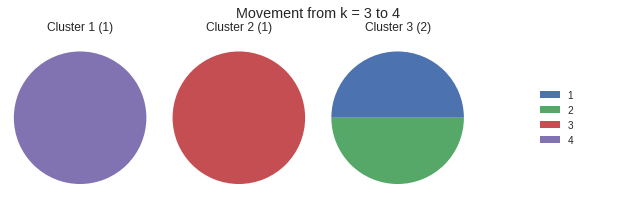

In [20]:
########################
## display_movement() ##
########################

# Create mock memberships
memberships = [('pt_1', 1, 2, 0), \
        ('pt_2', 0, 1, 3), \
        ('pt_3', 0, 2, 1), \
        ('pt_4', 1, 0, 4)]
memberships_cols = ['patient_id', 2, 3, 4]
memberships = pd.DataFrame(memberships, columns=memberships_cols)
memberships = memberships.set_index('patient_id')

# Make list of corresponding k_values
k_values = [2, 3, 4]

# Call the function
display_movement(memberships, k_values)

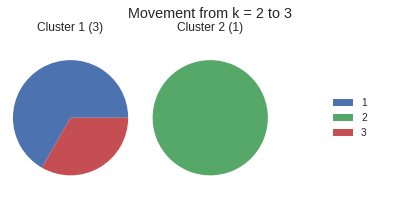

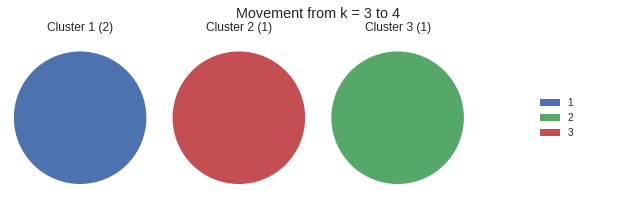

In [21]:
###################################
## visualize_movement_pipeline() ##
###################################

# Create mock cluster result a
clusters_a = [('pt_1', 1, 0), \
        ('pt_2', 0, 1), \
        ('pt_3', 1, 0), \
        ('pt_4', 1, 0)]
clusters_a_cols = ['patient_id', 'clust0', 'clust1']
clusters_a = pd.DataFrame(clusters_a, columns=clusters_a_cols)
clusters_a = clusters_a.set_index('patient_id')

# Create mock cluster result b
clusters_b = [('pt_1', 1, 0, 0), \
        ('pt_2', 0, 1, 0), \
        ('pt_3', 0, 0, 1), \
        ('pt_4', 1, 0, 0)]
clusters_b_cols = ['patient_id', 'clust0', 'clust1', 'clust2']
clusters_b = pd.DataFrame(clusters_b, columns=clusters_b_cols)
clusters_b = clusters_b.set_index('patient_id')

# Create mock cluster result c
clusters_c = [('pt_1', 1, 0, 0, 0), \
        ('pt_2', 0, 0, 0, 1), \
        ('pt_3', 0, 0, 1, 0), \
        ('pt_4', 1, 0, 0, 0)]
clusters_c_cols = ['patient_id', 'clust0', 'clust1', 'clust2', 'clust3']
clusters_c = pd.DataFrame(clusters_c, columns=clusters_c_cols)
clusters_c = clusters_c.set_index('patient_id')

# Create set of clustering results
all_clusters = [clusters_a, clusters_b, clusters_c]

# Call the function
visualize_movement_pipeline(all_clusters)